In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

In [2]:
## Read The data

In [3]:
df=pd.read_excel("heart_disease.xlsx")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,reversable defect,4


# EDA

In [5]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811

In [6]:
df.fillna(df["oldpeak"].median(), inplace=True)

In [7]:
## Detecting the outlier

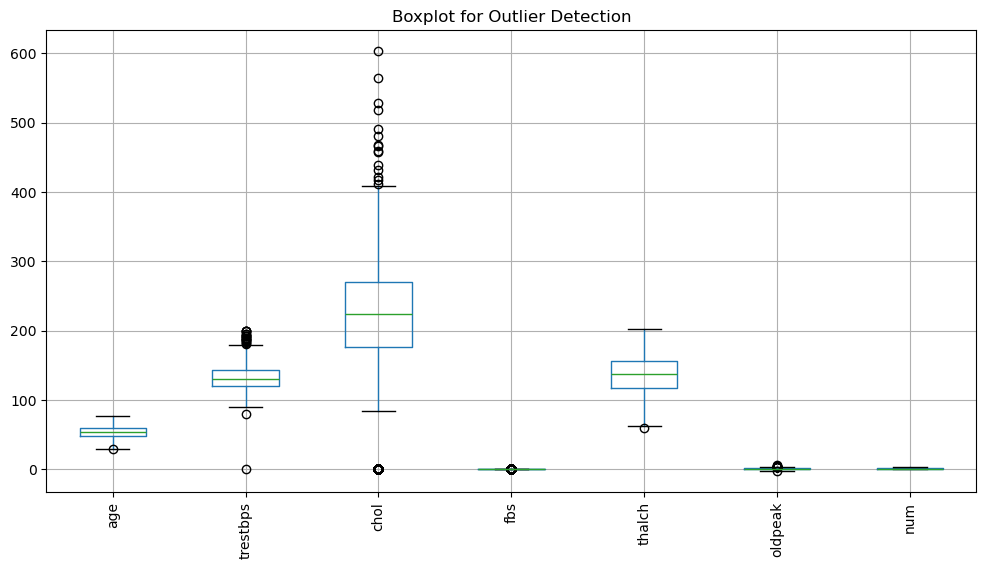

In [8]:
plt.figure(figsize=(12, 6))
df.boxplot(rot=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


In [9]:
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)  
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
outliers = ((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) | 
            (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR)))

print("Number of outliers in each column:\n", outliers.sum())

Number of outliers in each column:
 age           1
trestbps     22
chol        187
thalch        1
oldpeak      16
num           0
dtype: int64


In [10]:
## Data without outlier

In [11]:
df_cleaned = df.drop(index=outliers.any(axis=1)[outliers.any(axis=1)].index)
df_cleaned.reset_index(inplace=True)
df_cleaned

,index,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,897,63,Male,asymptomatic,170,177,False,normal,84,True,2.5,downsloping,reversable defect,4
688,902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,reversable defect,4


In [12]:
df_cleaned.isna().any()

index       False
age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalch      False
exang       False
oldpeak     False
slope       False
thal        False
num         False
dtype: bool

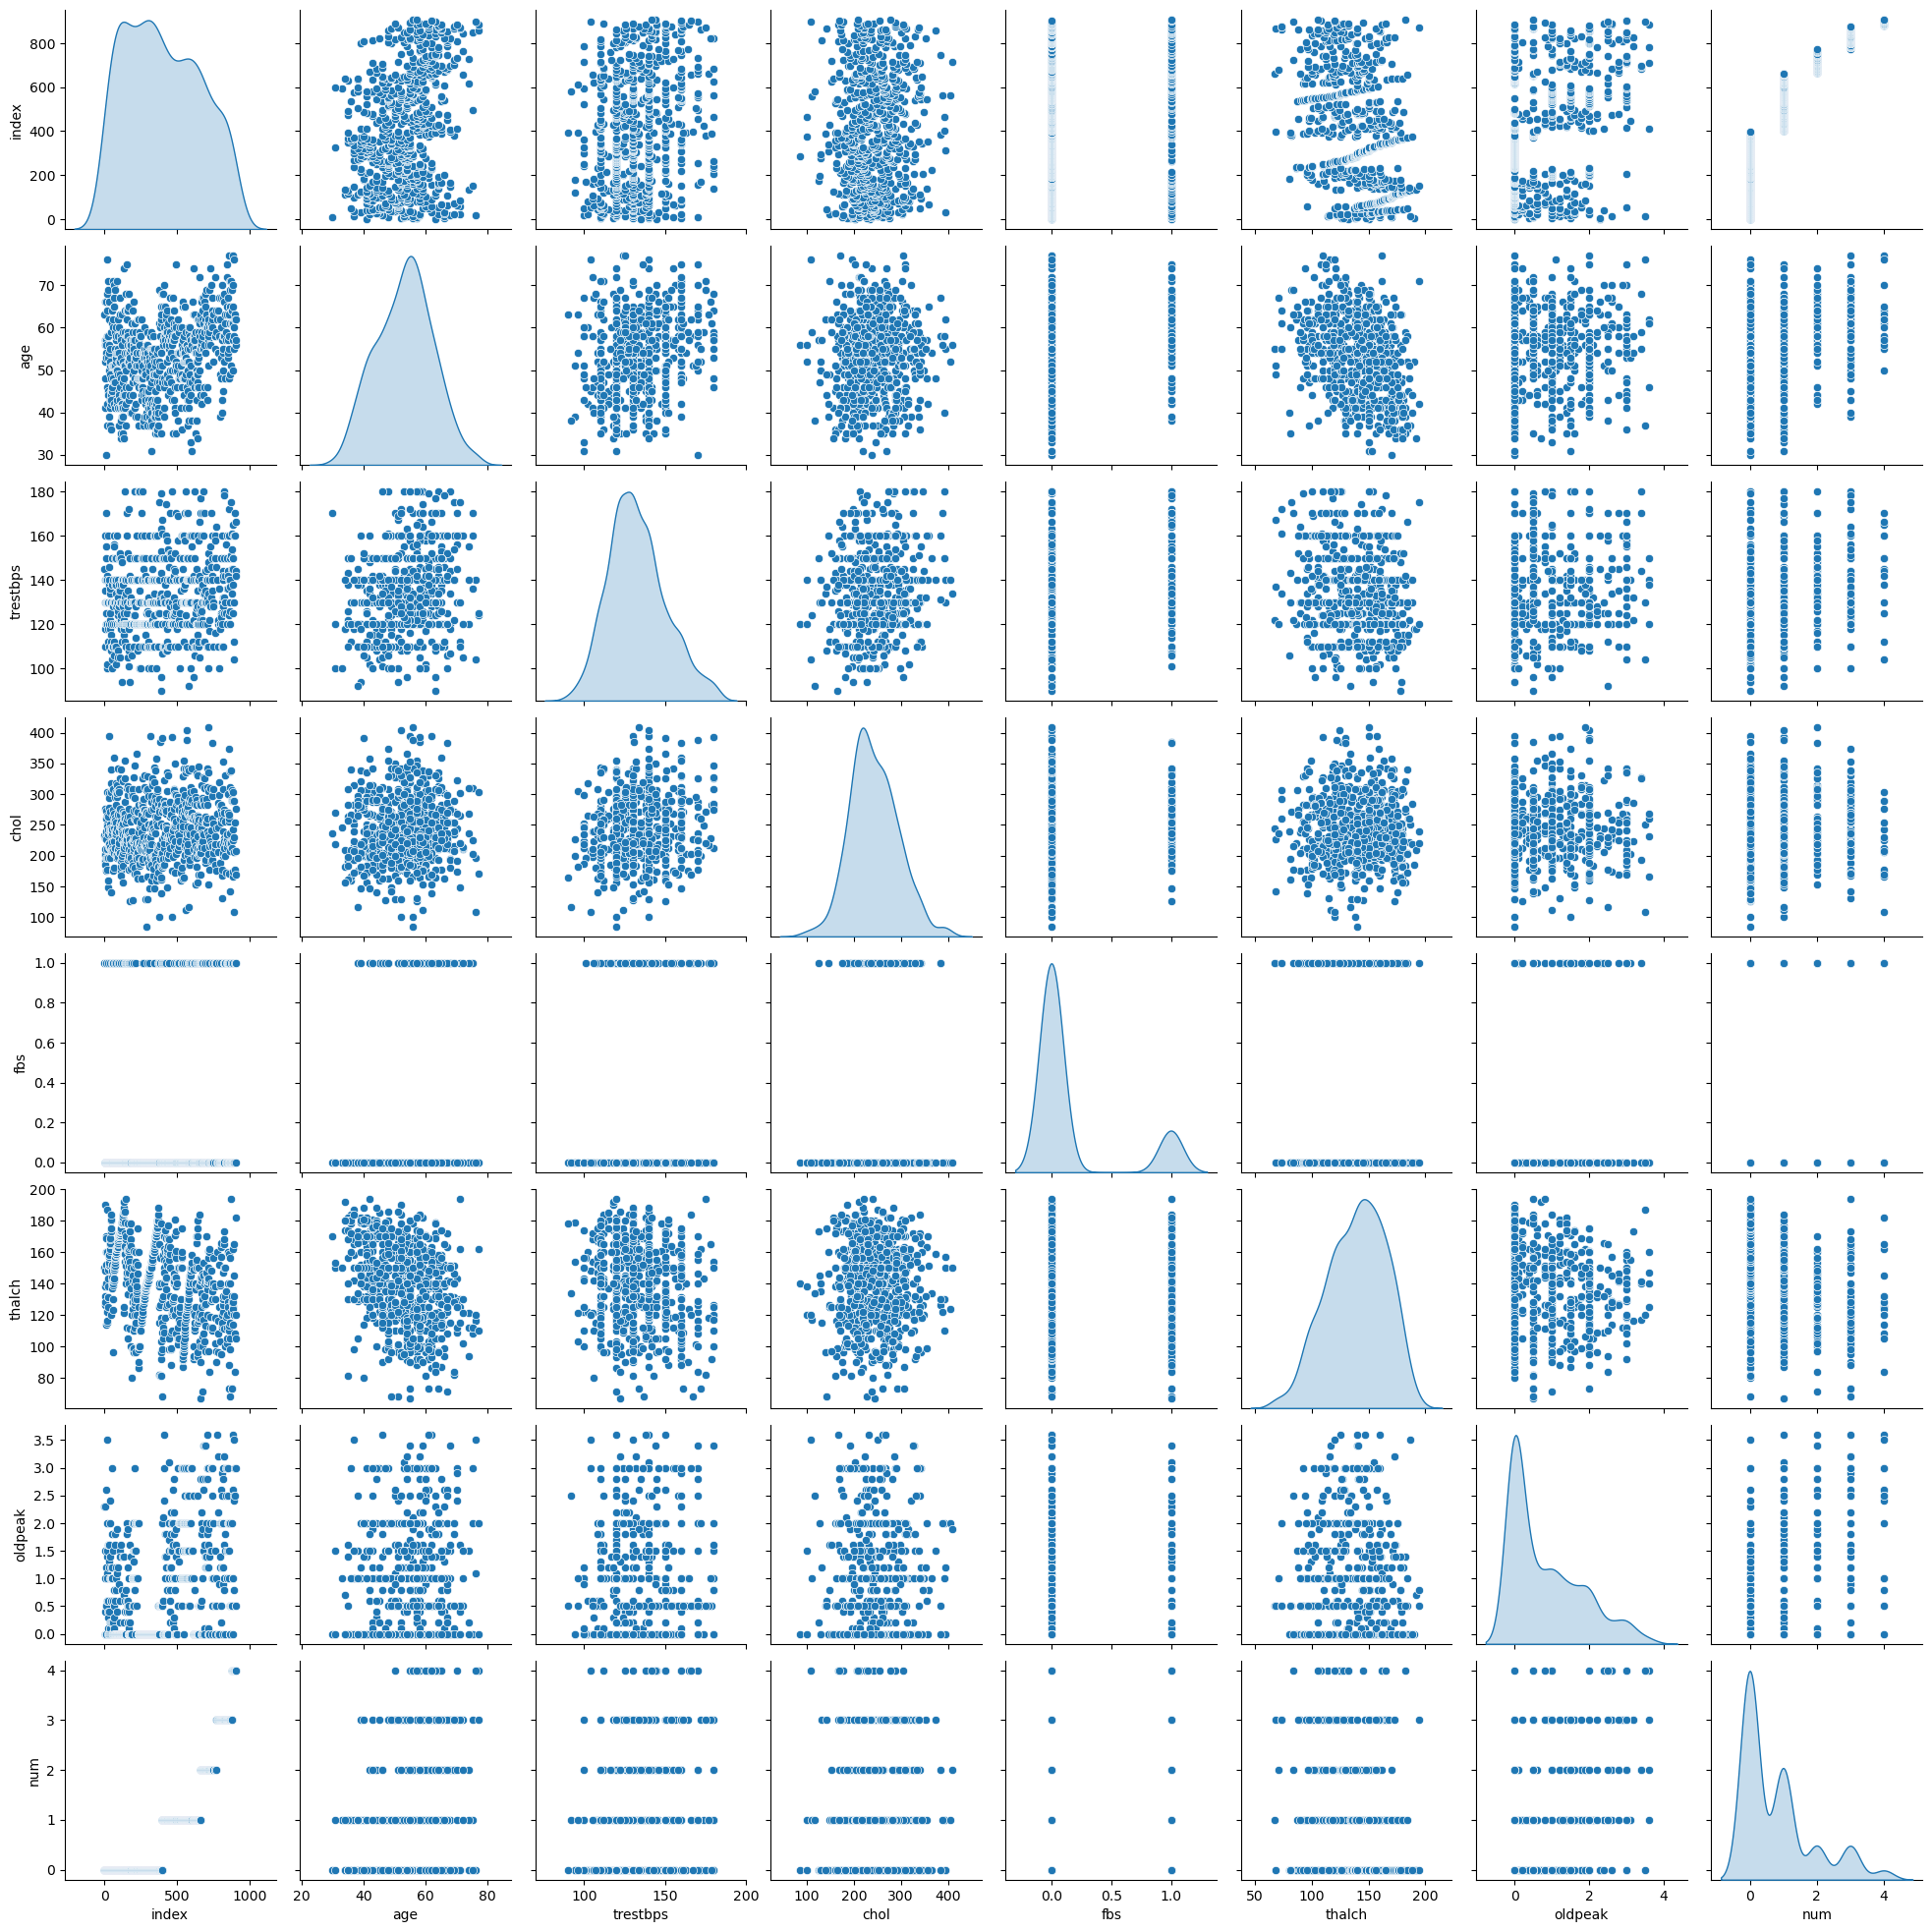

In [13]:
sns.pairplot(df_cleaned, diag_kind='kde')
plt.show()


In [14]:
## Correlation of the data

In [15]:
num_col=df_cleaned.select_dtypes(include=[np.number])
num_col

,index,age,trestbps,chol,thalch,oldpeak,num
0,0,63,145,233,150,2.3,0
1,1,41,135,203,132,0.0,0
2,2,57,140,192,148,0.4,0
3,3,52,118,186,190,0.0,0
4,4,57,110,201,126,1.5,0
...,...,...,...,...,...,...,...
687,897,63,170,177,84,2.5,4
688,902,62,160,254,108,3.0,4
689,904,62,166,170,120,3.0,4
690,906,56,144,208,105,0.5,4


In [16]:
corr=num_col.corr()

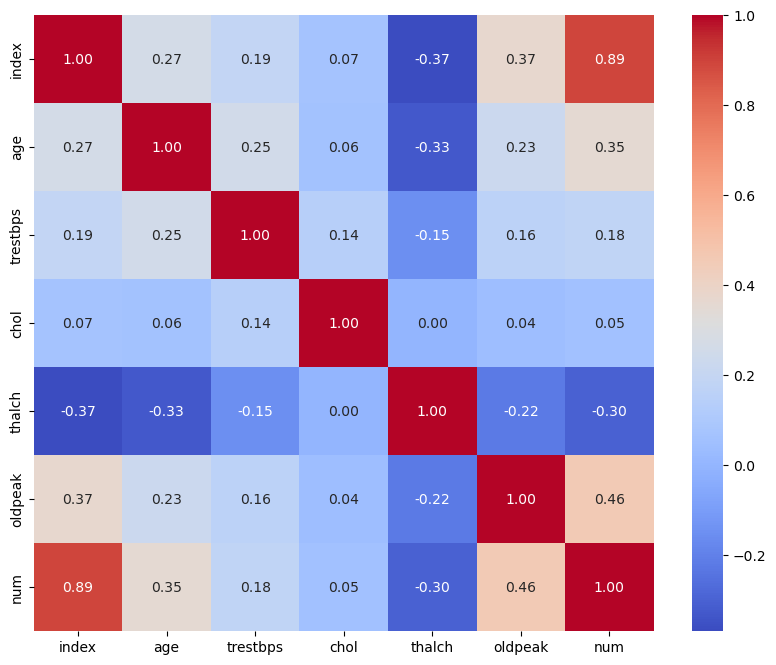

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Labeling

In [19]:
## Performing one hot encooder for certain columns

In [20]:
onehot=OneHotEncoder()

In [21]:
one=onehot.fit_transform(df_cleaned[["sex"]]).toarray()
one

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [22]:
one_df=pd.DataFrame(one)
one_df

,0,1
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,0.0,1.0
4,0.0,1.0
...,...,...
687,0.0,1.0
688,0.0,1.0
689,0.0,1.0
690,0.0,1.0


In [23]:
df_final=one_df.join(df_cleaned)
df_final

,0,1,index,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.0,1.0,0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,0.0,1.0,1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,0.0,1.0,2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,0.0,1.0,3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.0,1.0,4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,897,63,Male,asymptomatic,170,177,False,normal,84,True,2.5,downsloping,reversable defect,4
688,0.0,1.0,902,62,Male,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,0.0,1.0,904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,0.0,1.0,906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,reversable defect,4


In [24]:
df_final.drop(columns="sex",inplace=True)
df_final.rename(columns={0: "Female", 1: "Male"}, inplace=True)

In [25]:
df_final

,Female,Male,index,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.0,1.0,0,63,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,0.0,1.0,1,41,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,0.0,1.0,2,57,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,0.0,1.0,3,52,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.0,1.0,4,57,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,897,63,asymptomatic,170,177,False,normal,84,True,2.5,downsloping,reversable defect,4
688,0.0,1.0,902,62,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,0.0,1.0,904,62,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,0.0,1.0,906,56,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,reversable defect,4


In [26]:
one=onehot.fit_transform(df_cleaned[["fbs"]]).toarray()
one

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [27]:
one_df=pd.DataFrame(one)
one_df

,0,1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0
...,...,...
687,1.0,0.0
688,0.0,1.0
689,1.0,0.0
690,0.0,1.0


In [28]:
df_final=one_df.join(df_final)
df_final

,0,1,Female,Male,index,age,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.0,1.0,0.0,1.0,0,63,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1.0,0.0,0.0,1.0,1,41,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,1.0,0.0,0.0,1.0,2,57,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,1.0,0.0,0.0,1.0,3,52,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,1.0,0.0,0.0,1.0,4,57,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1.0,0.0,0.0,1.0,897,63,asymptomatic,170,177,False,normal,84,True,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,902,62,asymptomatic,160,254,True,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,1.0,0.0,0.0,1.0,904,62,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,906,56,non-anginal,144,208,True,st-t abnormality,105,TURE,0.5,downsloping,reversable defect,4


In [29]:
df_final.drop(columns="fbs",inplace=True)
df_final.rename(columns={0: "fbs_false", 1: "fbs_true"}, inplace=True)
df_final

,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.0,1.0,0.0,1.0,0,63,typical angina,145,233,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1.0,0.0,0.0,1.0,1,41,atypical angina,135,203,normal,132,False,0.0,flat,fixed defect,0
2,1.0,0.0,0.0,1.0,2,57,asymptomatic,140,192,normal,148,False,0.4,flat,fixed defect,0
3,1.0,0.0,0.0,1.0,3,52,typical angina,118,186,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,1.0,0.0,0.0,1.0,4,57,asymptomatic,110,201,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1.0,0.0,0.0,1.0,897,63,asymptomatic,170,177,normal,84,True,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,902,62,asymptomatic,160,254,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,1.0,0.0,0.0,1.0,904,62,asymptomatic,166,170,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,906,56,non-anginal,144,208,st-t abnormality,105,TURE,0.5,downsloping,reversable defect,4


In [30]:
df_final["exang"].unique()

array([False, True, 'FALSE', 'TURE'], dtype=object)

In [31]:
## Since there is spelling mistake rewriting the same

In [32]:
df_final["exang"].replace("FALSE", False, inplace=True) 
df_final

,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.0,1.0,0.0,1.0,0,63,typical angina,145,233,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1.0,0.0,0.0,1.0,1,41,atypical angina,135,203,normal,132,False,0.0,flat,fixed defect,0
2,1.0,0.0,0.0,1.0,2,57,asymptomatic,140,192,normal,148,False,0.4,flat,fixed defect,0
3,1.0,0.0,0.0,1.0,3,52,typical angina,118,186,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,1.0,0.0,0.0,1.0,4,57,asymptomatic,110,201,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1.0,0.0,0.0,1.0,897,63,asymptomatic,170,177,normal,84,True,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,902,62,asymptomatic,160,254,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,1.0,0.0,0.0,1.0,904,62,asymptomatic,166,170,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,906,56,non-anginal,144,208,st-t abnormality,105,TURE,0.5,downsloping,reversable defect,4


In [33]:
df_final["exang"].replace("TURE", True, inplace=True) 
df_final

,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,exang,oldpeak,slope,thal,num
0,0.0,1.0,0.0,1.0,0,63,typical angina,145,233,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1.0,0.0,0.0,1.0,1,41,atypical angina,135,203,normal,132,False,0.0,flat,fixed defect,0
2,1.0,0.0,0.0,1.0,2,57,asymptomatic,140,192,normal,148,False,0.4,flat,fixed defect,0
3,1.0,0.0,0.0,1.0,3,52,typical angina,118,186,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,1.0,0.0,0.0,1.0,4,57,asymptomatic,110,201,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,1.0,0.0,0.0,1.0,897,63,asymptomatic,170,177,normal,84,True,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,902,62,asymptomatic,160,254,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,1.0,0.0,0.0,1.0,904,62,asymptomatic,166,170,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,906,56,non-anginal,144,208,st-t abnormality,105,True,0.5,downsloping,reversable defect,4


In [34]:
one=onehot.fit_transform(df_final[["exang"]]).toarray()
one

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [1., 0.]])

In [35]:
one_df=pd.DataFrame(one)
one_df

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
687,0.0,1.0
688,0.0,1.0
689,0.0,1.0
690,0.0,1.0


In [36]:
df_final=one_df.join(df_final)
df_final

,0,1,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,exang,oldpeak,slope,thal,num
0,1.0,0.0,0.0,1.0,0.0,1.0,0,63,typical angina,145,233,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1,41,atypical angina,135,203,normal,132,False,0.0,flat,fixed defect,0
2,1.0,0.0,1.0,0.0,0.0,1.0,2,57,asymptomatic,140,192,normal,148,False,0.4,flat,fixed defect,0
3,1.0,0.0,1.0,0.0,0.0,1.0,3,52,typical angina,118,186,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,0.0,1.0,1.0,0.0,0.0,1.0,4,57,asymptomatic,110,201,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,897,63,asymptomatic,170,177,normal,84,True,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,0.0,1.0,902,62,asymptomatic,160,254,st-t abnormality,108,True,3.0,flat,reversable defect,4
689,0.0,1.0,1.0,0.0,0.0,1.0,904,62,asymptomatic,166,170,st-t abnormality,120,True,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,0.0,1.0,906,56,non-anginal,144,208,st-t abnormality,105,True,0.5,downsloping,reversable defect,4


In [37]:
df_final.drop(columns="exang",inplace=True)
df_final.rename(columns={0: "exang_false", 1: "exang_true"}, inplace=True)
df_final

,exang_false,exang_true,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num
0,1.0,0.0,0.0,1.0,0.0,1.0,0,63,typical angina,145,233,lv hypertrophy,150,2.3,downsloping,fixed defect,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1,41,atypical angina,135,203,normal,132,0.0,flat,fixed defect,0
2,1.0,0.0,1.0,0.0,0.0,1.0,2,57,asymptomatic,140,192,normal,148,0.4,flat,fixed defect,0
3,1.0,0.0,1.0,0.0,0.0,1.0,3,52,typical angina,118,186,lv hypertrophy,190,0.0,flat,fixed defect,0
4,0.0,1.0,1.0,0.0,0.0,1.0,4,57,asymptomatic,110,201,normal,126,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,897,63,asymptomatic,170,177,normal,84,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,0.0,1.0,902,62,asymptomatic,160,254,st-t abnormality,108,3.0,flat,reversable defect,4
689,0.0,1.0,1.0,0.0,0.0,1.0,904,62,asymptomatic,166,170,st-t abnormality,120,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,0.0,1.0,906,56,non-anginal,144,208,st-t abnormality,105,0.5,downsloping,reversable defect,4


In [44]:
print(df_final["cp"].unique())
print(df_final["restecg"].unique())
print(df_final["thal"].unique())
print(df_final["slope"].unique())

['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']
['lv hypertrophy' 'normal' 'st-t abnormality']
['fixed defect' 'normal' 'reversable defect']
['downsloping' 'flat' 'upsloping']


In [48]:
ordinal=OrdinalEncoder()

In [50]:
df_final["cp"]=ordinal.fit_transform(df_final[["cp"]])
df_final

,exang_false,exang_true,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num
0,1.0,0.0,0.0,1.0,0.0,1.0,0,63,3.0,145,233,lv hypertrophy,150,2.3,downsloping,fixed defect,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1,41,1.0,135,203,normal,132,0.0,flat,fixed defect,0
2,1.0,0.0,1.0,0.0,0.0,1.0,2,57,0.0,140,192,normal,148,0.4,flat,fixed defect,0
3,1.0,0.0,1.0,0.0,0.0,1.0,3,52,3.0,118,186,lv hypertrophy,190,0.0,flat,fixed defect,0
4,0.0,1.0,1.0,0.0,0.0,1.0,4,57,0.0,110,201,normal,126,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,897,63,0.0,170,177,normal,84,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,0.0,1.0,902,62,0.0,160,254,st-t abnormality,108,3.0,flat,reversable defect,4
689,0.0,1.0,1.0,0.0,0.0,1.0,904,62,0.0,166,170,st-t abnormality,120,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,0.0,1.0,906,56,2.0,144,208,st-t abnormality,105,0.5,downsloping,reversable defect,4


In [52]:
df_final["restecg"]=ordinal.fit_transform(df_final[["restecg"]])
df_final

,exang_false,exang_true,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num
0,1.0,0.0,0.0,1.0,0.0,1.0,0,63,3.0,145,233,0.0,150,2.3,downsloping,fixed defect,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1,41,1.0,135,203,1.0,132,0.0,flat,fixed defect,0
2,1.0,0.0,1.0,0.0,0.0,1.0,2,57,0.0,140,192,1.0,148,0.4,flat,fixed defect,0
3,1.0,0.0,1.0,0.0,0.0,1.0,3,52,3.0,118,186,0.0,190,0.0,flat,fixed defect,0
4,0.0,1.0,1.0,0.0,0.0,1.0,4,57,0.0,110,201,1.0,126,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,897,63,0.0,170,177,1.0,84,2.5,downsloping,reversable defect,4
688,0.0,1.0,0.0,1.0,0.0,1.0,902,62,0.0,160,254,2.0,108,3.0,flat,reversable defect,4
689,0.0,1.0,1.0,0.0,0.0,1.0,904,62,0.0,166,170,2.0,120,3.0,flat,reversable defect,4
690,0.0,1.0,0.0,1.0,0.0,1.0,906,56,2.0,144,208,2.0,105,0.5,downsloping,reversable defect,4


In [54]:
df_final["thal"]=ordinal.fit_transform(df_final[["thal"]])
df_final

,exang_false,exang_true,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num
0,1.0,0.0,0.0,1.0,0.0,1.0,0,63,3.0,145,233,0.0,150,2.3,downsloping,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1,41,1.0,135,203,1.0,132,0.0,flat,0.0,0
2,1.0,0.0,1.0,0.0,0.0,1.0,2,57,0.0,140,192,1.0,148,0.4,flat,0.0,0
3,1.0,0.0,1.0,0.0,0.0,1.0,3,52,3.0,118,186,0.0,190,0.0,flat,0.0,0
4,0.0,1.0,1.0,0.0,0.0,1.0,4,57,0.0,110,201,1.0,126,1.5,flat,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,897,63,0.0,170,177,1.0,84,2.5,downsloping,2.0,4
688,0.0,1.0,0.0,1.0,0.0,1.0,902,62,0.0,160,254,2.0,108,3.0,flat,2.0,4
689,0.0,1.0,1.0,0.0,0.0,1.0,904,62,0.0,166,170,2.0,120,3.0,flat,2.0,4
690,0.0,1.0,0.0,1.0,0.0,1.0,906,56,2.0,144,208,2.0,105,0.5,downsloping,2.0,4


In [56]:
df_final["slope"]=ordinal.fit_transform(df_final[["slope"]])
df_final

,exang_false,exang_true,fbs_false,fbs_true,Female,Male,index,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num
0,1.0,0.0,0.0,1.0,0.0,1.0,0,63,3.0,145,233,0.0,150,2.3,0.0,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,1,41,1.0,135,203,1.0,132,0.0,1.0,0.0,0
2,1.0,0.0,1.0,0.0,0.0,1.0,2,57,0.0,140,192,1.0,148,0.4,1.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,1.0,3,52,3.0,118,186,0.0,190,0.0,1.0,0.0,0
4,0.0,1.0,1.0,0.0,0.0,1.0,4,57,0.0,110,201,1.0,126,1.5,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,897,63,0.0,170,177,1.0,84,2.5,0.0,2.0,4
688,0.0,1.0,0.0,1.0,0.0,1.0,902,62,0.0,160,254,2.0,108,3.0,1.0,2.0,4
689,0.0,1.0,1.0,0.0,0.0,1.0,904,62,0.0,166,170,2.0,120,3.0,1.0,2.0,4
690,0.0,1.0,0.0,1.0,0.0,1.0,906,56,2.0,144,208,2.0,105,0.5,0.0,2.0,4


In [58]:
df_final.drop(columns="index",inplace=True)

In [60]:
df_final

,exang_false,exang_true,fbs_false,fbs_true,Female,Male,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal,num
0,1.0,0.0,0.0,1.0,0.0,1.0,63,3.0,145,233,0.0,150,2.3,0.0,0.0,0
1,1.0,0.0,1.0,0.0,0.0,1.0,41,1.0,135,203,1.0,132,0.0,1.0,0.0,0
2,1.0,0.0,1.0,0.0,0.0,1.0,57,0.0,140,192,1.0,148,0.4,1.0,0.0,0
3,1.0,0.0,1.0,0.0,0.0,1.0,52,3.0,118,186,0.0,190,0.0,1.0,0.0,0
4,0.0,1.0,1.0,0.0,0.0,1.0,57,0.0,110,201,1.0,126,1.5,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,63,0.0,170,177,1.0,84,2.5,0.0,2.0,4
688,0.0,1.0,0.0,1.0,0.0,1.0,62,0.0,160,254,2.0,108,3.0,1.0,2.0,4
689,0.0,1.0,1.0,0.0,0.0,1.0,62,0.0,166,170,2.0,120,3.0,1.0,2.0,4
690,0.0,1.0,0.0,1.0,0.0,1.0,56,2.0,144,208,2.0,105,0.5,0.0,2.0,4


In [ ]:
## Seperating Feature and Target

In [62]:
feature=df_final.iloc[:,:15]
feature

,exang_false,exang_true,fbs_false,fbs_true,Female,Male,age,cp,trestbps,chol,restecg,thalch,oldpeak,slope,thal
0,1.0,0.0,0.0,1.0,0.0,1.0,63,3.0,145,233,0.0,150,2.3,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,1.0,41,1.0,135,203,1.0,132,0.0,1.0,0.0
2,1.0,0.0,1.0,0.0,0.0,1.0,57,0.0,140,192,1.0,148,0.4,1.0,0.0
3,1.0,0.0,1.0,0.0,0.0,1.0,52,3.0,118,186,0.0,190,0.0,1.0,0.0
4,0.0,1.0,1.0,0.0,0.0,1.0,57,0.0,110,201,1.0,126,1.5,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687,0.0,1.0,1.0,0.0,0.0,1.0,63,0.0,170,177,1.0,84,2.5,0.0,2.0
688,0.0,1.0,0.0,1.0,0.0,1.0,62,0.0,160,254,2.0,108,3.0,1.0,2.0
689,0.0,1.0,1.0,0.0,0.0,1.0,62,0.0,166,170,2.0,120,3.0,1.0,2.0
690,0.0,1.0,0.0,1.0,0.0,1.0,56,2.0,144,208,2.0,105,0.5,0.0,2.0


In [64]:
target=pd.DataFrame(df_final.iloc[:,15])
target

,num
0,0
1,0
2,0
3,0
4,0
...,...
687,4
688,4
689,4
690,4


In [66]:
target["num"].unique()

array([0, 1, 2, 3, 4], dtype=int64)

In [68]:
x_train,x_test,y_train,y_test=train_test_split(feature,target,random_state=100,train_size=.70)

## Decision Tree

In [70]:
clf=DecisionTreeClassifier(max_depth=8,max_leaf_nodes=10,criterion="gini")

In [72]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, max_leaf_nodes=10)

In [74]:
y_pred=clf.predict(x_train)

y_pred

array([0, 0, 0, 3, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0,
       0, 3, 0, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0, 3, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 3, 0, 0, 2, 0, 1, 1, 1, 3, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 3, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 3, 1, 0, 0, 1,
       0, 0, 3, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [76]:
confusion_matrix(y_train,y_pred)

array([[234,  18,   1,   1,   0],
       [ 50,  76,   5,   1,   0],
       [ 10,  24,   6,   4,   0],
       [ 10,  28,   2,   5,   0],
       [  1,   5,   1,   2,   0]], dtype=int64)

In [78]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84       254
           1       0.50      0.58      0.54       132
           2       0.40      0.14      0.20        44
           3       0.38      0.11      0.17        45
           4       0.00      0.00      0.00         9

    accuracy                           0.66       484
   macro avg       0.41      0.35      0.35       484
weighted avg       0.61      0.66      0.62       484



In [80]:
y_pred1=clf.predict(x_test)
y_pred1

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 3, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 3, 2, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 3, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 3, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [82]:
confusion_matrix(y_test,y_pred1)

array([[91, 16,  1,  2,  0],
       [26, 32,  1,  3,  0],
       [ 4, 11,  0,  0,  0],
       [ 5,  9,  0,  0,  0],
       [ 3,  3,  1,  0,  0]], dtype=int64)

In [84]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       110
           1       0.45      0.52      0.48        62
           2       0.00      0.00      0.00        15
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00         7

    accuracy                           0.59       208
   macro avg       0.23      0.27      0.25       208
weighted avg       0.51      0.59      0.55       208



## Hyperparamter Tuning

In [86]:
param_grid = {
    'max_depth': [10, 4, 6, None],
    'max_leaf_nodes': [10, 8, 5],
    'criterion': ['gini', 'entropy']}

In [88]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 4, 6, None],
                         'max_leaf_nodes': [10, 8, 5]},
             scoring='accuracy')

In [92]:
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)


Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'max_leaf_nodes': 5}
Best Accuracy: 0.6197809278350516


In [ ]:
## Based on gridsearch result build a decision tree with best parameter

In [94]:
clf=DecisionTreeClassifier(max_depth=10,max_leaf_nodes=5,criterion="gini")

In [96]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=5)

In [98]:
y_pred=clf.predict(x_train)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,

In [100]:
confusion_matrix(y_train,y_pred)

array([[236,  18,   0,   0,   0],
       [ 61,  71,   0,   0,   0],
       [ 20,  24,   0,   0,   0],
       [ 17,  28,   0,   0,   0],
       [  4,   5,   0,   0,   0]], dtype=int64)

In [102]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80       254
           1       0.49      0.54      0.51       132
           2       0.00      0.00      0.00        44
           3       0.00      0.00      0.00        45
           4       0.00      0.00      0.00         9

    accuracy                           0.63       484
   macro avg       0.24      0.29      0.26       484
weighted avg       0.50      0.63      0.56       484



In [104]:
y_pred1=clf.predict(x_test)
y_pred1

array([0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0], dtype=int64)

In [106]:
confusion_matrix(y_test,y_pred1)

array([[98, 12,  0,  0,  0],
       [31, 31,  0,  0,  0],
       [ 4, 11,  0,  0,  0],
       [ 5,  9,  0,  0,  0],
       [ 4,  3,  0,  0,  0]], dtype=int64)

In [108]:
fnames=df_final.columns

In [110]:
fnames.values

array(['exang_false', 'exang_true', 'fbs_false', 'fbs_true', 'Female',
       'Male', 'age', 'cp', 'trestbps', 'chol', 'restecg', 'thalch',
       'oldpeak', 'slope', 'thal', 'num'], dtype=object)

In [112]:
cname=df["num"].unique()
cname

array([0, 1, 2, 3, 4], dtype=int64)

In [114]:
cname = df["num"].astype(str).unique()  # Convert numeric values to strings

## Decision Tree visualization

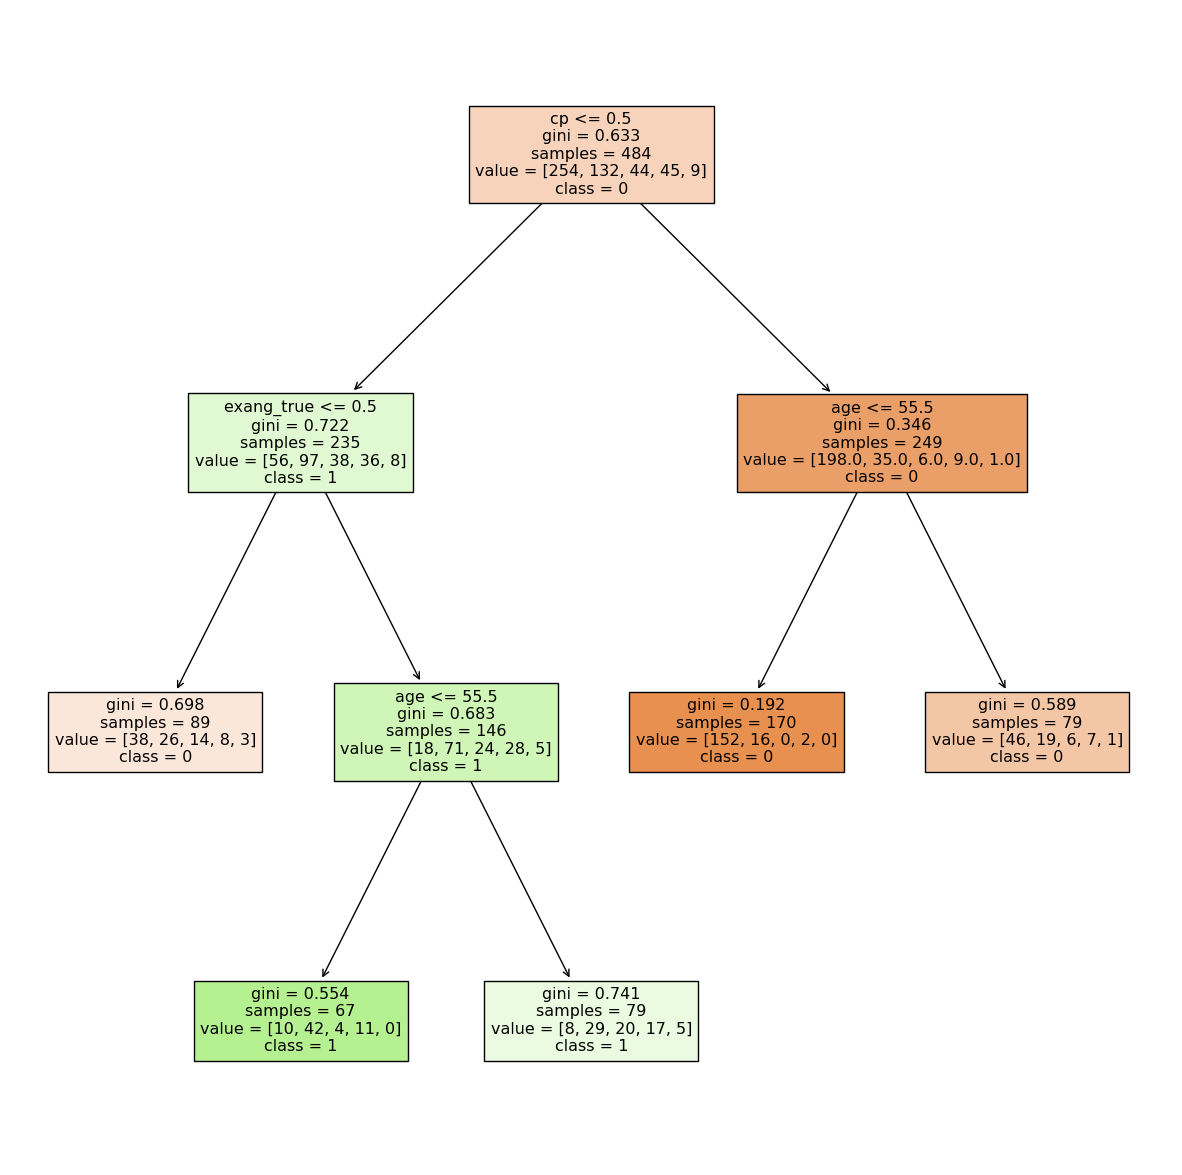

In [116]:
plt.figure(figsize=(15,15))
plot_tree(clf,feature_names=fnames,class_names=cname,filled=True)
plt.show()

## Interview Questions

1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

1.max_depth (Tree Depth)
Limits the maximum depth of the tree.
Shallow trees (low max_depth) → Less complex, prevents overfitting but may underfit.
Deep trees (high max_depth) → More complex, can overfit on training data.

2. min_samples_split (Minimum Samples to Split a Node)
Controls how many samples are needed to split an internal node.
Lower values → More splits, leading to deeper trees and possible overfitting.
Higher values → Fewer splits, resulting in a more generalized model.

3. min_samples_leaf (Minimum Samples in a Leaf Node)
Defines the minimum number of samples required in a leaf.
Low values (e.g., 1) → Tree can create very small leaves, increasing variance.
Higher values → Encourages larger leaves, reducing overfitting.

4. max_features (Number of Features Considered for Split)
Defines how many features are used at each split.
Lower values → Reduces overfitting and improves generalization.
Higher values → Uses more features, increasing complexity.

5. criterion (Splitting Metric)
Defines the function used to measure split quality.
"gini" (default): Uses Gini impurity.
"entropy": Uses information gain (more computationally expensive).

6. splitter (Splitting Strategy)
Controls how the tree chooses the best split.
"best" (default): Chooses the best possible split.
"random": Chooses a random split, which can help in reducing overfitting.

2. What is the difference between the Label encoding and One-hot encoding?

Label Encoding assigns a unique integer to each category (e.g., "Red" → 0, "Green" → 1, "Blue" → 2"), useful for ordinal data.

One-Hot Encoding creates separate binary columns for each category (e.g., "Red" → [1,0,0], "Green" → [0,1,0]"), suitable for nominal data.